In [37]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [38]:
img = cv2.imread('opencv_logo.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgray = 255-imgray

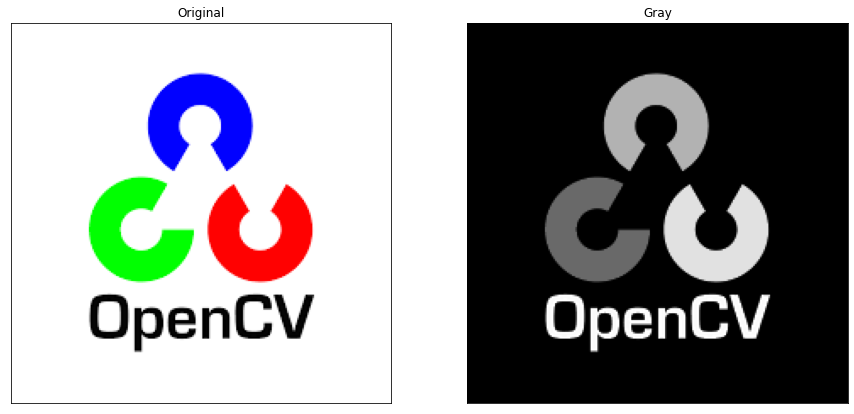

In [39]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [40]:
ret,thresh = cv2.threshold(imgray,8,255,cv2.THRESH_BINARY)


In [41]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [42]:
imgcontour = cv2.drawContours(img, contours, -1, (255,32,32),2)
img = cv2. imread('opencv_logo.png')

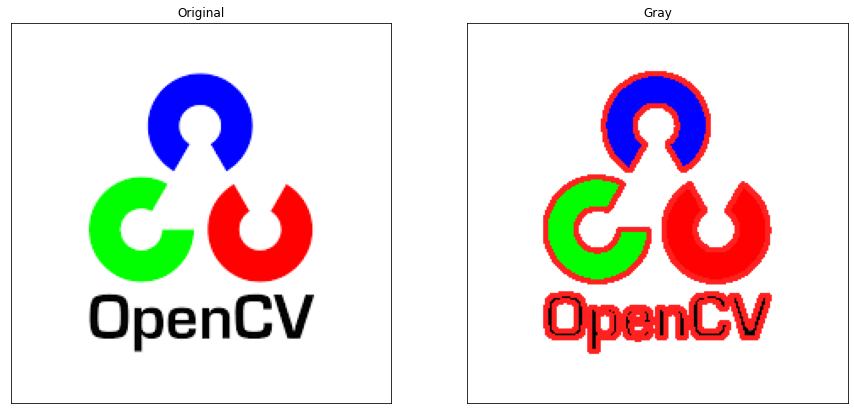

In [44]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgcontour,cmap = 'gray')
plt.title('Gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [45]:
cnt = contours[0]
epsilon = 0.01*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [46]:
imgcontour = cv2.imread('opencv_logo.png')
imgcontour = cv2.drawContours(imgcontour, [cnt], -1, (255,32,255), 3)
imgapprox = cv2.imread('opencv_logo.png')
imgapprox = cv2.drawContours(imgapprox, [approx], -1, (255,32,255), 3)
img = cv2.imread('opencv_logo.png')

In [47]:
cnt.shape, approx.shape

((24, 1, 2), (13, 1, 2))

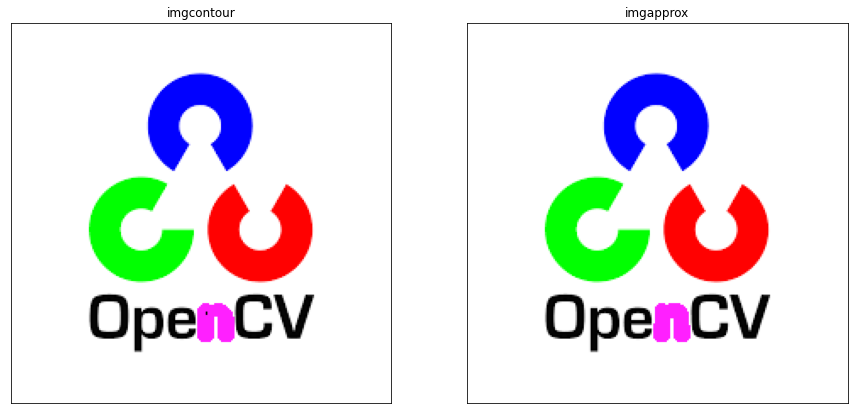

In [50]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgcontour)
plt.title('imgcontour'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgapprox,cmap = 'gray')
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.show()

In [51]:
hull=cv2.convexHull(approx)

In [54]:
imghull= cv2.imread('opencv_logo.png')
imghull = cv2.drawContours(imghull,[hull],-1,(255,32,255),3)

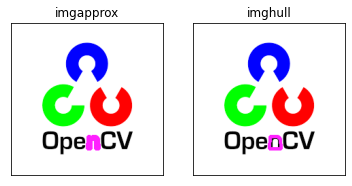

In [56]:
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imghull,cmap = 'gray')
plt.title('imghull'), plt.xticks([]), plt.yticks([])
plt.show()

In [57]:
imgcontour = cv2.imread('opencv_logo.png')
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
imgcontour = cv2.drawContours(imgcontour,[box],0,(0,0,255),2)

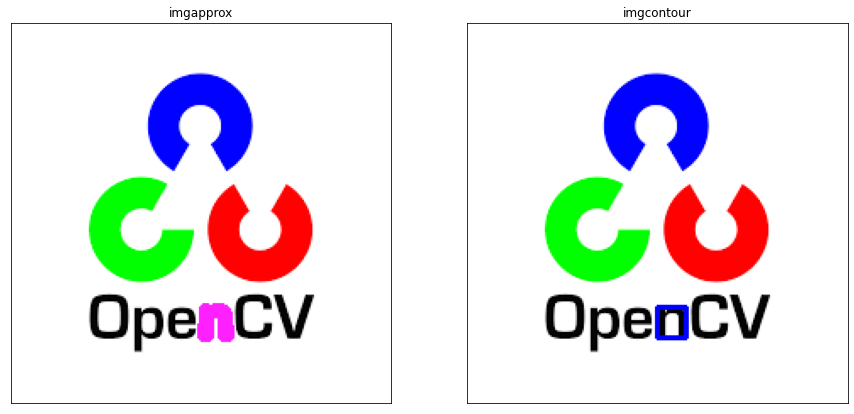

In [58]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgcontour,cmap = 'gray')
plt.title('imgcontour'), plt.xticks([]), plt.yticks([])
plt.show()

In [59]:
cnt = contours[9]
M = cv2.moments(cnt)
print(M)

{'m00': 2090.0, 'm10': 306444.5, 'm01': 264319.1666666666, 'm20': 45605301.5, 'm11': 38755887.25, 'm02': 33871362.83333333, 'm30': 6884248518.25, 'm21': 5765220278.1, 'm12': 4966414358.833333, 'm03': 4394838151.05, 'mu20': 673133.2797846869, 'mu11': 310.7573763951659, 'mu02': 443314.092969168, 'mu30': 14165.029565811157, 'mu21': -2504960.100833133, 'mu12': -24457.454200536013, 'mu03': -952863.8884544373, 'nu20': 0.15410207636837225, 'nu11': 7.114245928325037e-05, 'nu02': 0.1014889981843749, 'nu30': 7.093356218408464e-05, 'nu21': -0.012543972623252539, 'nu12': -0.00012247446010175533, 'nu03': -0.004771612340844485}


In [60]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [61]:
area = cv2.contourArea(cnt)

In [62]:
perimeter = cv2.arcLength(cnt,True)

In [63]:
imginfo = cv2.imread('opencv_logo.png')
imginfo = cv2.circle(imginfo,(cx,cy), 5, (0,0,255), -1)
font = cv2.FONT_HERSHEY_SIMPLEX
msg = "A"+str(area)+"L"+str(perimeter)
imginfo=cv2.putText(imginfo,msg,(cx,cy), font, 1,(32,32,32),2,cv2.LINE_AA)

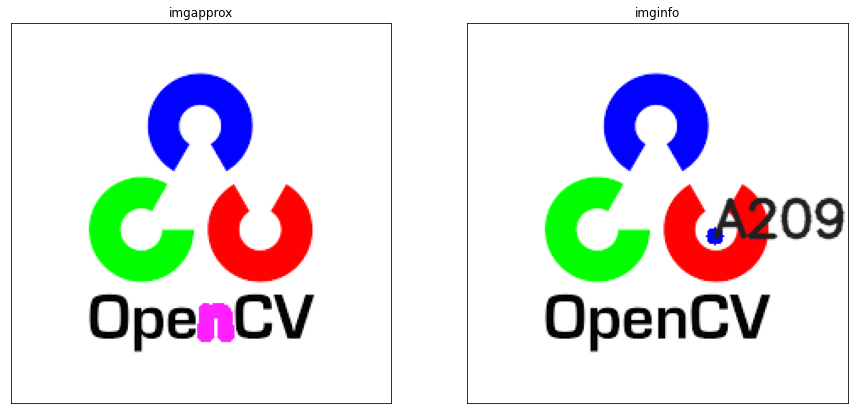

In [64]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imginfo,cmap = 'gray')
plt.title('imginfo'), plt.xticks([]), plt.yticks([])
plt.show()